In [93]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from functools import reduce

sns.set(context='poster', style='whitegrid')

rcParams['font.family'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [94]:
DIR = 'dz-mm-cpc-embedded-imb/256-2-0.1-2L'
csv_paths = glob.glob(os.path.join(DIR, '*'))
norm = 9.729614

In [95]:
dfs = list()
for csv_path in csv_paths:
  name = os.path.basename(csv_path).split('.')[-2]
  name = name.replace('_', ' ')
  name = name.capitalize()
  df = pd.read_csv(csv_path)
  df.columns = ['time', 'step', name]
  df = df.drop('time', axis=1)
  dfs.append(df)

metrics = reduce(lambda x, y: pd.merge(x, y, how='outer', on='step'), dfs)
metrics = metrics.set_index('step')

[Text(0,0.5,'Value'), Text(0.5,0,'Iteration')]

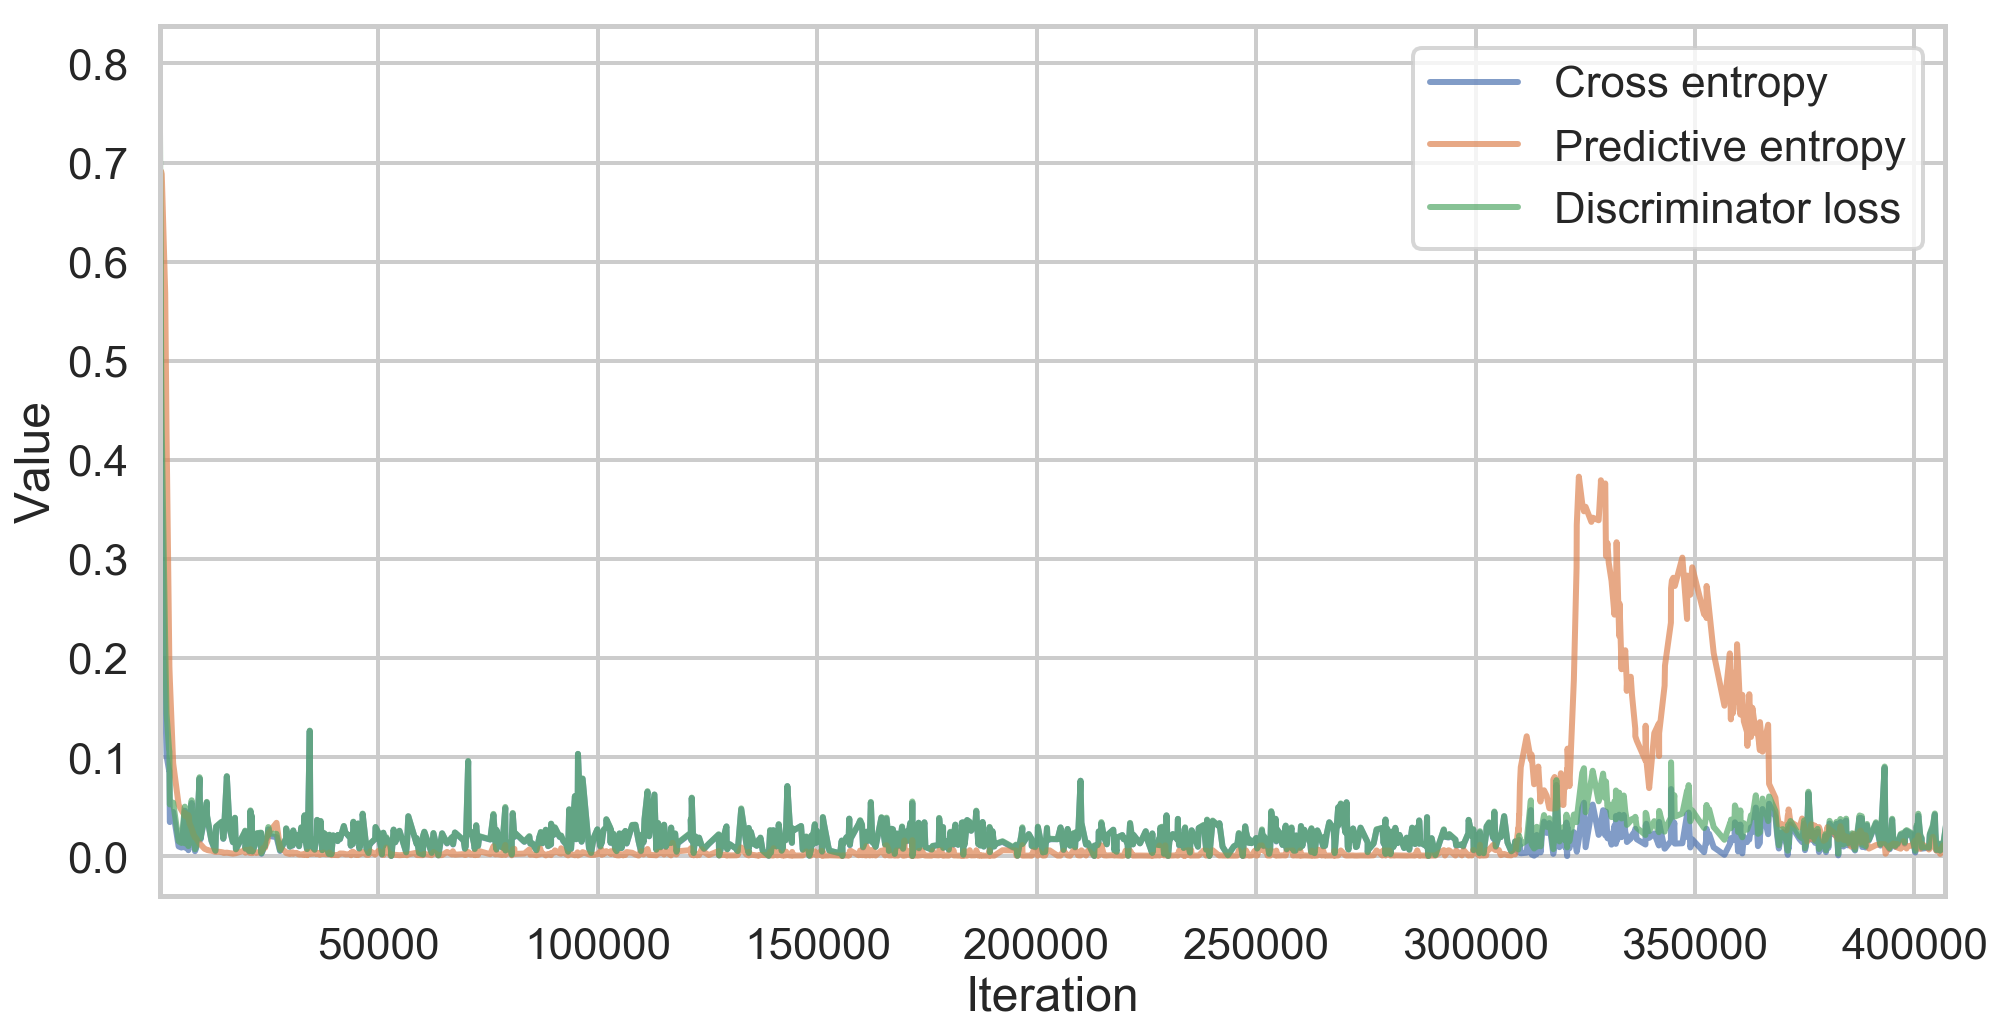

In [71]:
data = metrics[['Cross entropy', 'Predictive entropy', 'Discriminator loss']]
ax = data.plot.line(figsize=(16,8), alpha=0.7)
ax.set(xlabel='Iteration', ylabel='Value')

[Text(0,0.5,'Value'), Text(0.5,0,'Iteration')]

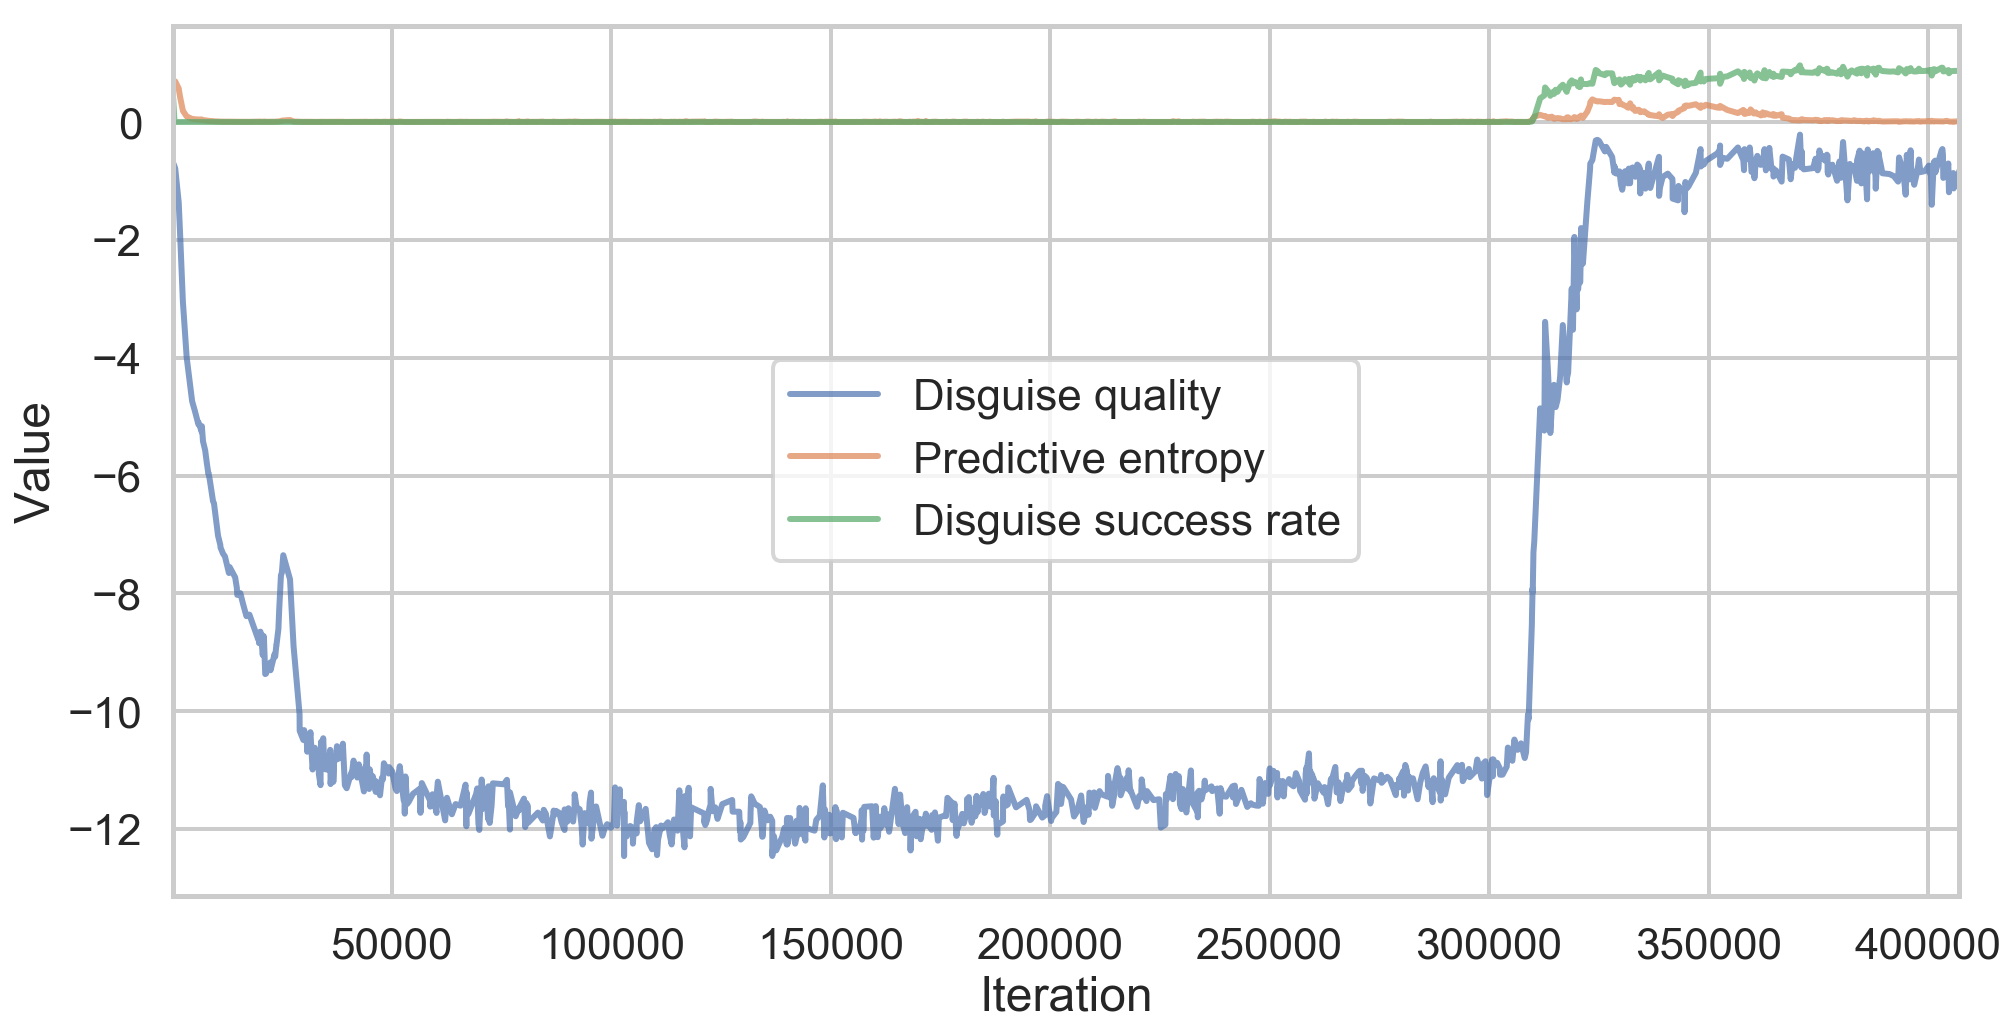

In [72]:
data = metrics[['Disguise quality', 'Predictive entropy', 'Disguise success rate']]
ax = data.plot.line(figsize=(16,8), alpha=0.7)
ax.set(xlabel='Iteration', ylabel='Value')

[Text(0,0.5,'Value'), Text(0.5,0,'Iteration')]

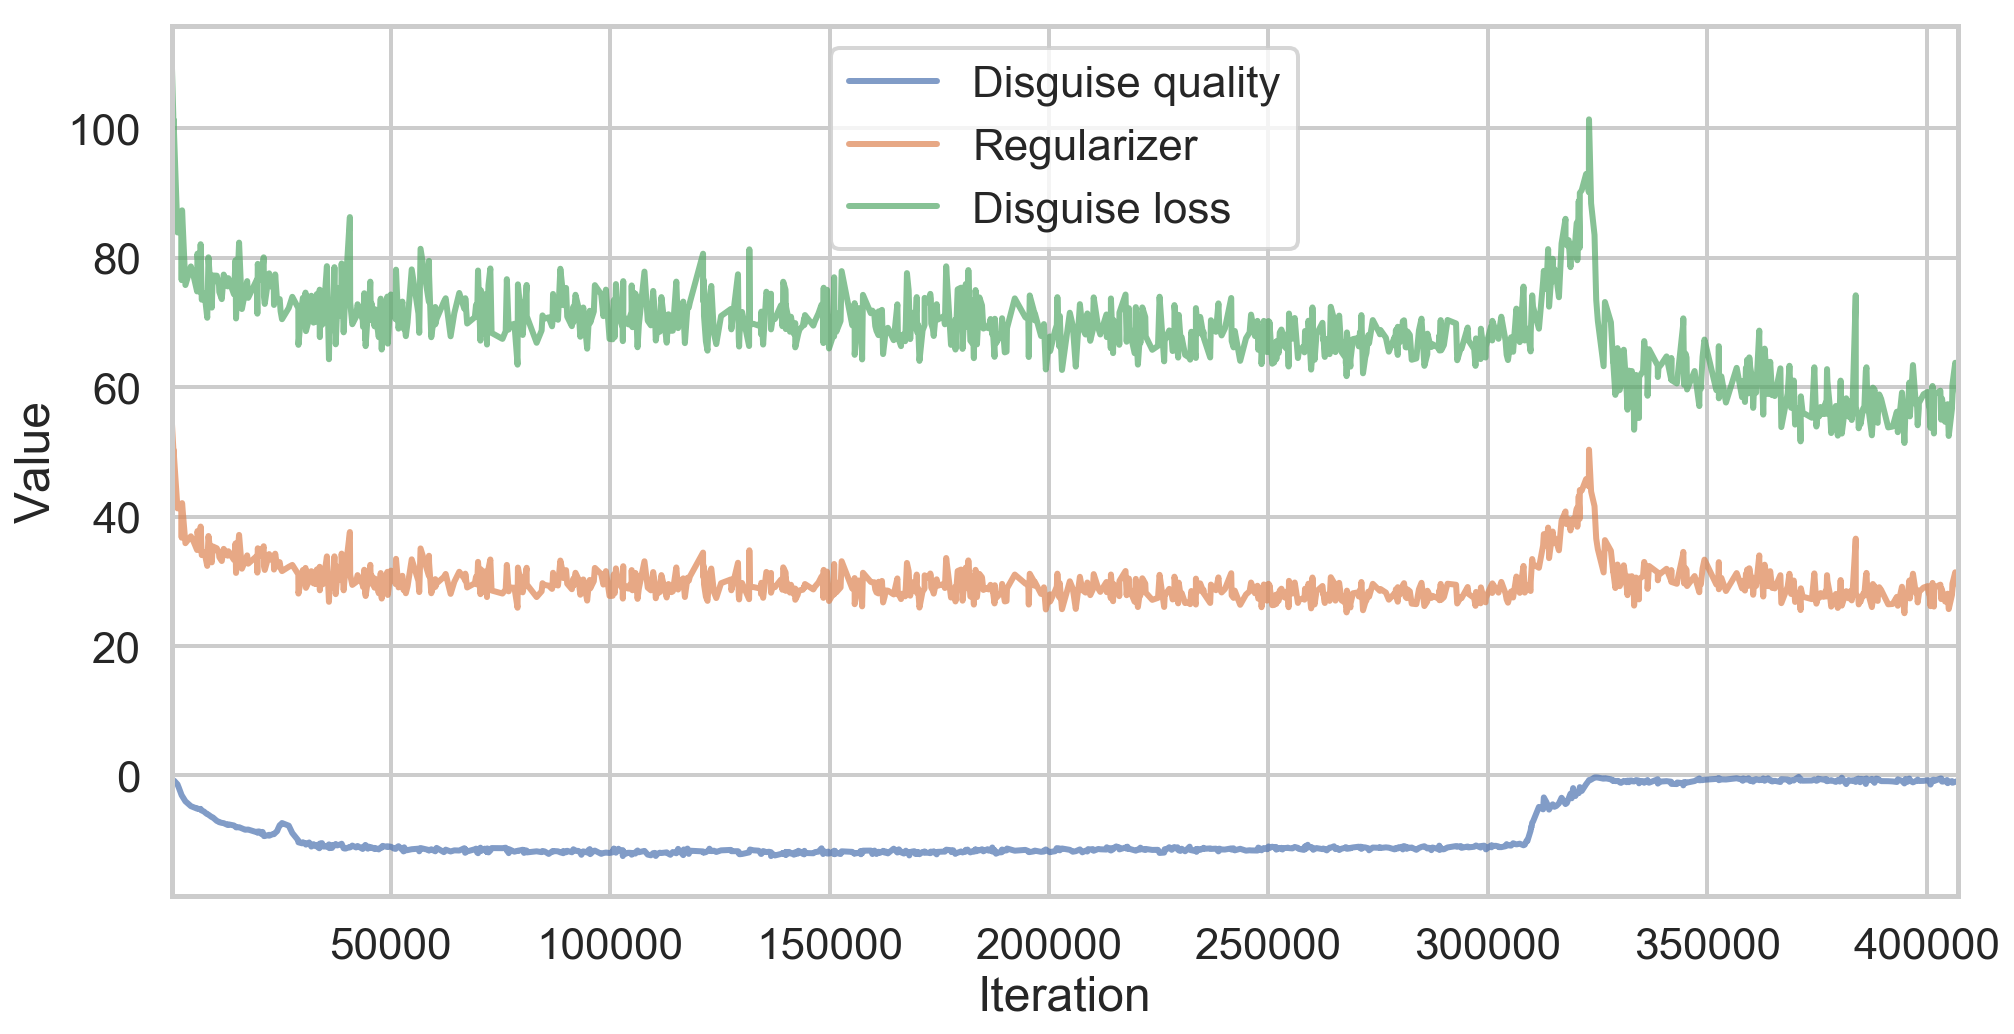

In [73]:
data = metrics[['Disguise quality', 'Regularizer', 'Disguise loss']]
ax = data.plot.line(figsize=(16,8), alpha=0.7)
ax.set(xlabel='Iteration', ylabel='Value')

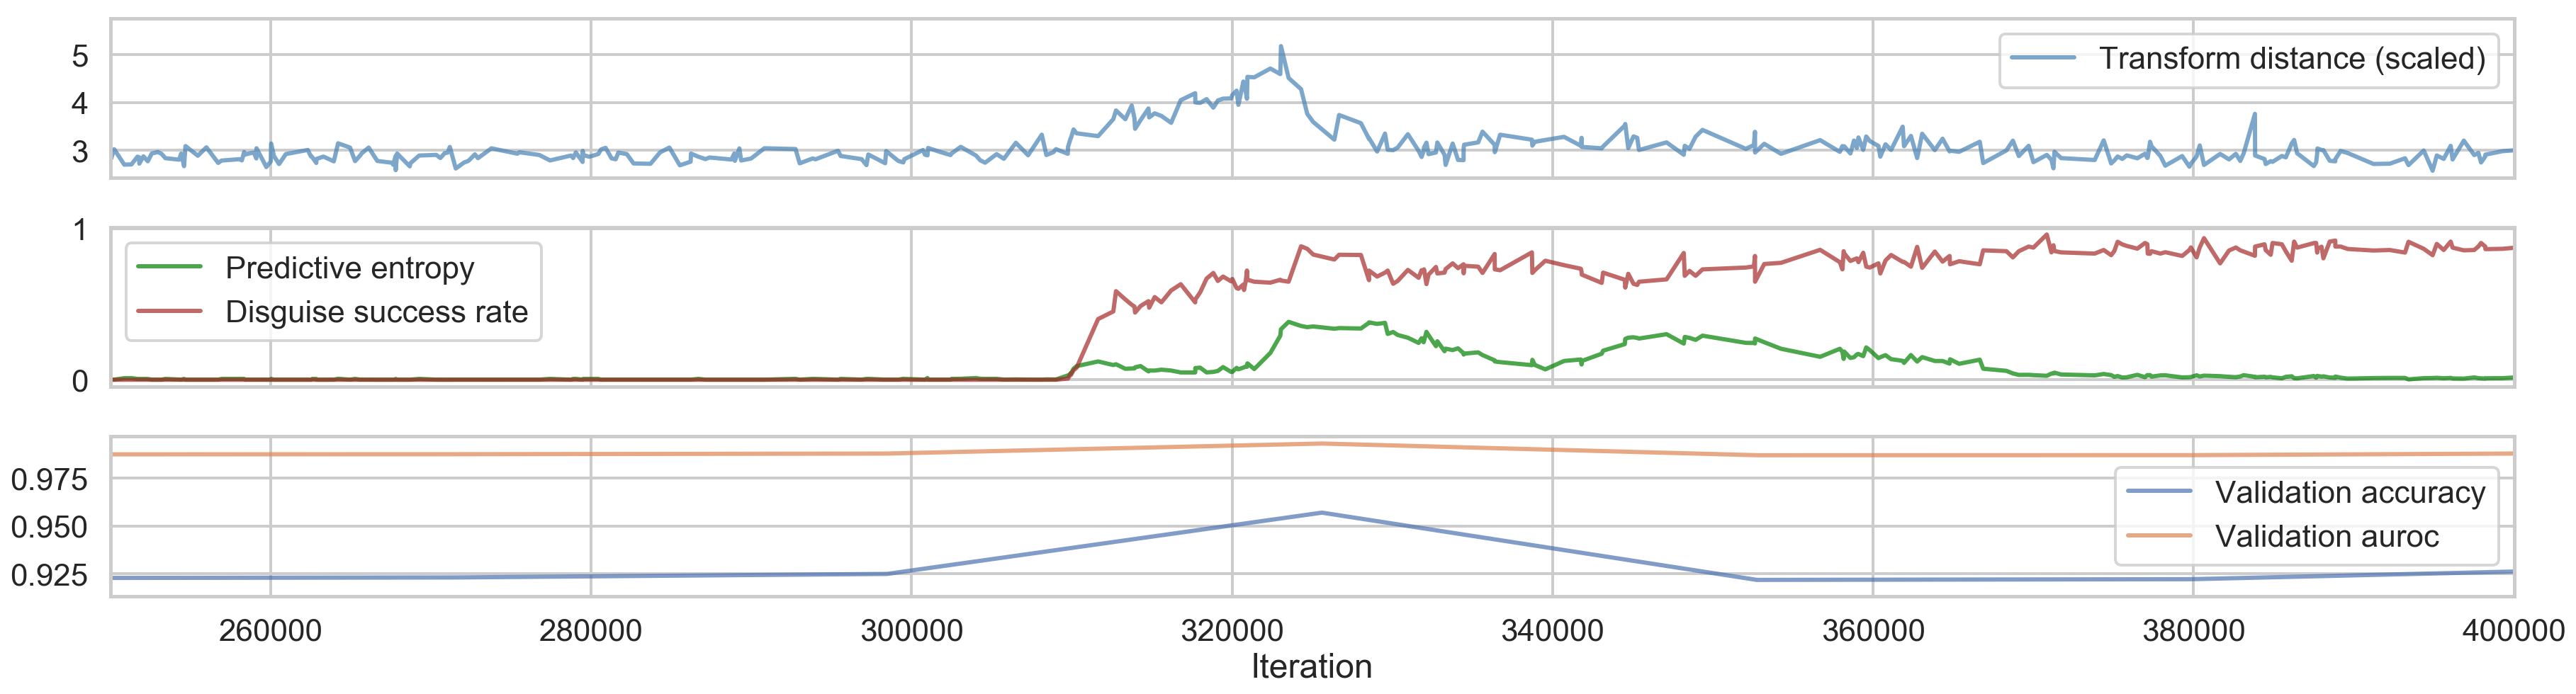

In [96]:
fig, axes = plt.subplots(3, 1, figsize=(25, 7))

data = metrics[['Regularizer']] / norm
data.columns = ['Transform distance (scaled)']
data.plot.line(alpha=0.7, ax=axes[0], color='steelblue')
axes[0].set_xticklabels([])
axes[0].set_xlabel('')

data = metrics[['Predictive entropy', 'Disguise success rate']]
data.plot.line(alpha=0.7, ax=axes[1], color=['green', 'brown'])
axes[1].set_xticklabels([])
axes[1].set_xlabel('')

data = metrics[['Validation accuracy', 'Validation auroc']]
data = data.dropna()
data = data.sort_index()
data.plot.line(alpha=0.7, ax=axes[2])
axes[2].set(xlabel='Iteration')

fig.tight_layout()

for ax in axes:
  ax.set(xlim=(250000, 400000))